 ## Author : karim abdelhalim mohammed

##  TASK #3 : THE AIM OF THE PROJECT IS TO TO FIND OUT WEAK AREAS WHERE YOU CAN WORK TO MAKE MORE PROFITS AS A BUSINESS MANAGER

### IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as plo
import plotly.graph_objects as go

### load data_set

In [4]:
Superstore = pd.read_csv('SampleSuperstore.csv')


### DATA EXPLORATORY

In [5]:
Superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
Superstore.shape

(9994, 13)

In [7]:
Superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
Superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
Superstore.duplicated().sum() # Checking whether my dataset has duplicate records.There are total 17 duplicate records.


17

In [12]:
Superstore=Superstore.drop_duplicates() #Dropping the  duplicated Values
Superstore.shape #Checking the final dimension of the data


(9977, 13)

## DATA VISUALIZATION

 ### Regional Analysis

<AxesSubplot:ylabel='Region'>

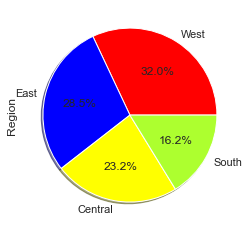

In [70]:
# Which region has the maximum transactions
#colors = ( "orange", "cyan", "brown",
        #  "grey", "indigo", "beige")
#
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']

#
Superstore['Region'].value_counts().plot.pie(colors=colors,autopct="%.1f%%", shadow = True)

##### The above plot indicates that People from all regions tends to have interest more of the company's product but those at western and eastern purchase more of the company's product.

### The relationship between Sales & Profit

In [18]:
data = [go.Scatter(
        x = Superstore.Sales,
        y = Superstore.Profit,
        mode='markers',
        marker = dict(
            size=14,
            color='rgb(25,45,35)',
            
            line = dict(
                width=2,
            )))]

In [19]:
layout = go.Layout(
title = 'Sales Vs Profits',
xaxis = dict(title='Sales'),
yaxis = dict(title='Profits'))
fig = go.Figure(data=data, layout=layout)
fig.show()

### The Visualization Above Indicates the positive relation between sales and profits. if the organization make low sales, they'll run into loss but if the company make more sales, they'll get more profits...


### REGION ANALYSIS

Text(0.5, 1.0, 'REGION WISE SALES AND PROFIT')

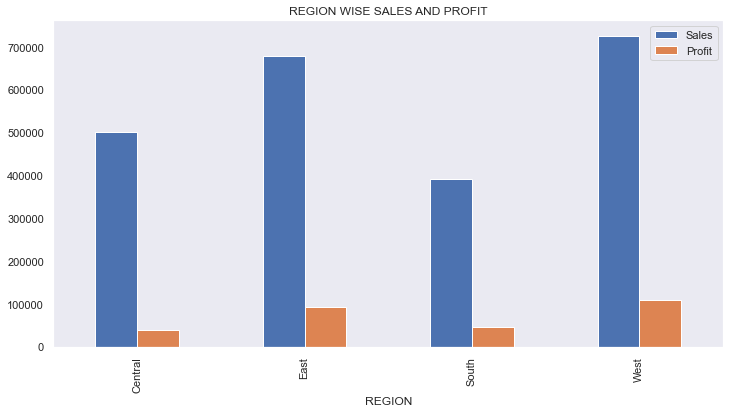

In [31]:
#then we will check what amount of sales and profits were being made by each Region
Superstore.groupby(['Region'])[['Sales','Profit']].sum().plot.bar(figsize=(12,6))
plt.xlabel("REGION")
plt.title("REGION WISE SALES AND PROFIT")

## Segment Analysis

Text(0.5, 1.0, 'SEGMENT VIA SALES AND PROFIT')

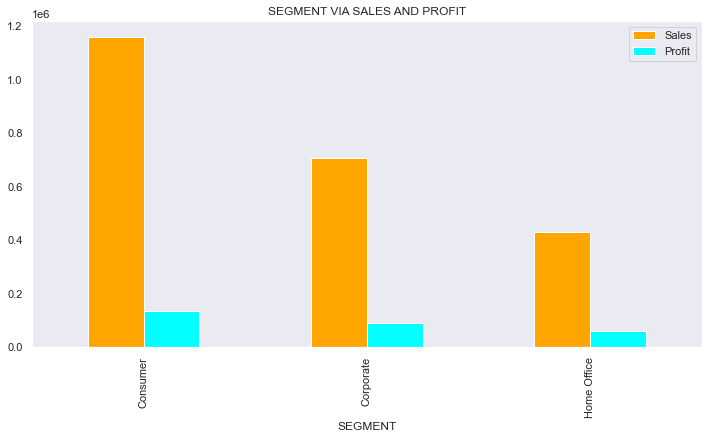

In [35]:
# To check maximum Sales and Profit in each segment
sns.set(style="dark")
Superstore.groupby(['Segment'])[['Sales','Profit']].sum().plot.bar(color=colors,figsize=(12,6))
plt.xlabel("SEGMENT")
plt.title("SEGMENT VIA SALES AND PROFIT")

##### The Above Plot Explains that The Consumers purchases more of the company's Product, So, The Company Should Focus more on the consumer's choice and try as much as possile to keep the Quality of their product.

###  SHIP MODE ANALYSIS

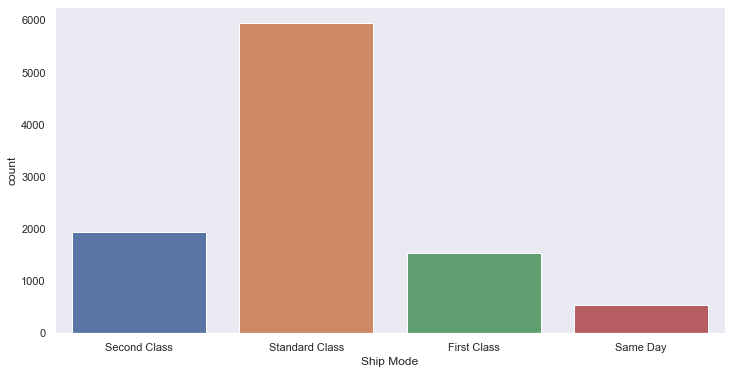

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='Ship Mode', data=Superstore)
plt.show()

###### The above plot indicates that ship mode with Standard class tends to reflect positively to the Profits as it prolongs battery life during the shipment stage of a product and that will make shipment faster.. If shipment is fast, it wil improve Sales and automatically increase the Profits..

### Product Analysis

Text(0.5, 1.0, 'PRODUCT CATEGORY WISE SALES AND PROFIT')

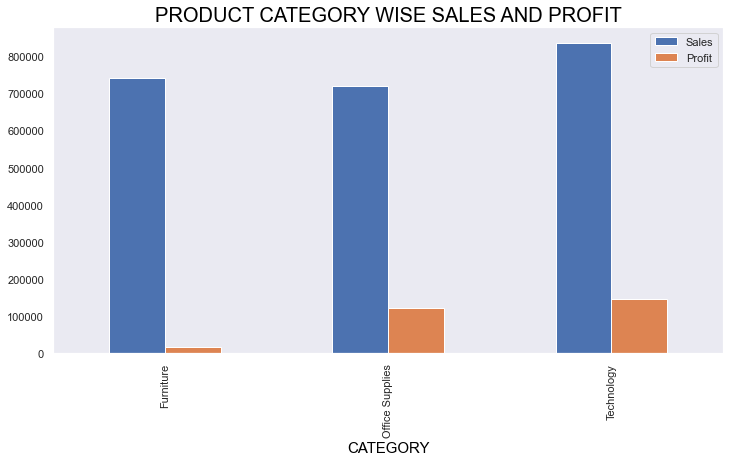

In [40]:
# To check profit and sales for each Product 
Superstore.groupby(['Category'])[['Sales','Profit']].sum().plot.bar(figsize=(12,6))
plt.xlabel("CATEGORY",fontdict={'color':'black','fontsize':15})
plt.title("PRODUCT CATEGORY WISE SALES AND PROFIT",fontdict={'color':'black','fontsize':20})

##### This Bar Plot shows that Technology has achieve maximum sales and subsequently Profit was also the highest. But in case of Furniture, though Sales is high, profit is the least

Text(0.5, 1.0, 'SUB-CATEGORY WISE SALES AND PROFIT FOR FURNITURE')

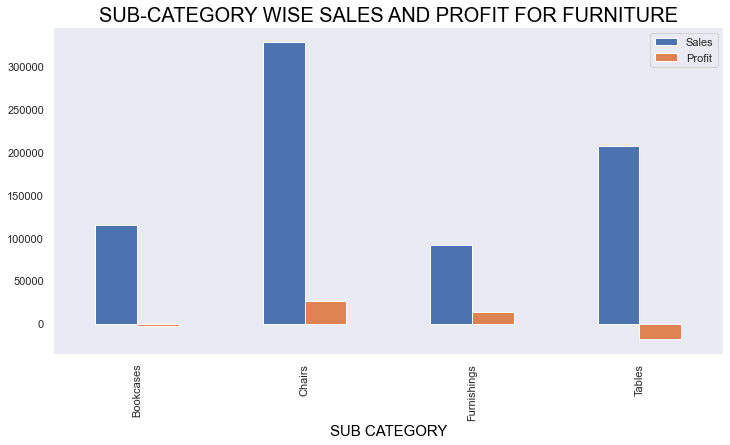

In [61]:
#Since Furniture showed an unsual trend, now looking at sales and profit for subcategories of Furniture
sns.set(style='dark')
Superstore[Superstore['Category']=='Furniture'].groupby(['Sub-Category'])[['Sales','Profit']].sum().plot.bar(figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'black','fontsize':15})
plt.title("SUB-CATEGORY WISE SALES AND PROFIT FOR FURNITURE",fontdict={'color':'black','fontsize':20})

##### So we have sub categories of Furniture which are Bookcases,Chairs,Furnishings and Tables. With this Bar Plot we can conclude that irrespective of high sales in Tables and Bookcases the store is incurring loss. This loss is affecting the whole of Furniture Category

### SUB-CATEGORY WISE SALES

Text(0.5, 1.0, 'SUB-CATEGORY WISE SALES')

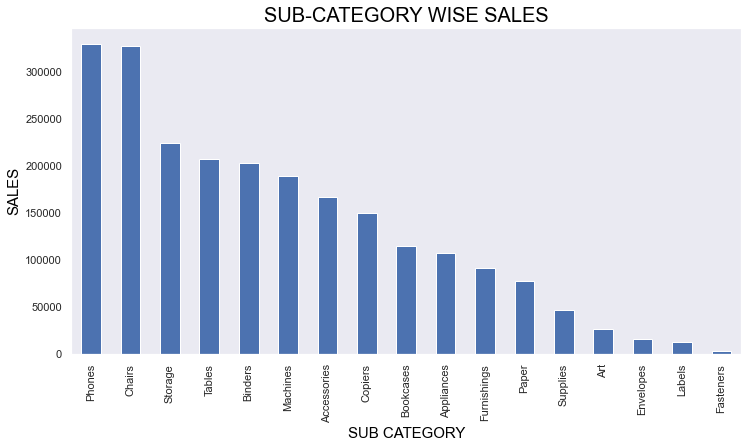

In [44]:
#  the Top Products Sold
sns.set(style='dark')
Superstore.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'black','fontsize':15})
plt.ylabel("SALES",fontdict={'color':'black','fontsize':15})
plt.title("SUB-CATEGORY WISE SALES",fontdict={'color':'black','fontsize':20})

#####  With this we concluded that Phones,Chairs ,Storage,Tables and Binders are being sold the most

### SUB-CATEGORY WISE PROFIT

Text(0.5, 1.0, 'SUB-CATEGORY WISE PROFIT')

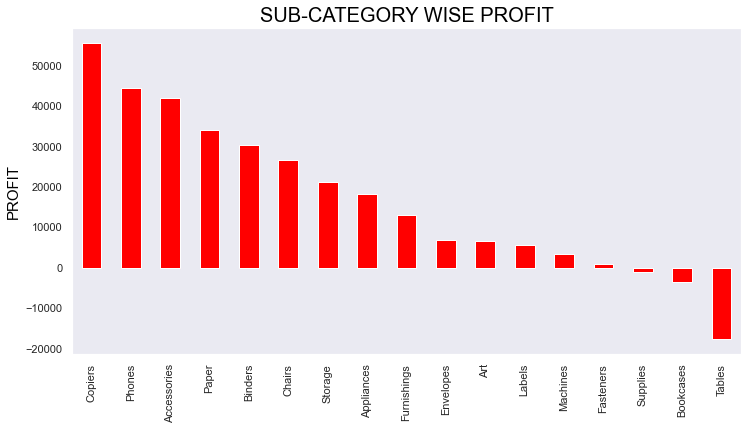

In [46]:
# the profit earned from all the Sub-Categories
sns.set(style='dark')
Superstore.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False).plot.bar(color=['red'],figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'white','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'black','fontsize':15})
plt.title("SUB-CATEGORY WISE PROFIT",fontdict={'color':'black','fontsize':20})

##### Here we saw Copiers, Phones, Accessories are the top profit giving products to the store ..Buy Bookcases and Tables make losses .so we should increase the price of Bookcases and Tables and cancel discount

In [63]:
# Finding the correlation between variables
corr_data=Superstore.corr()
display(corr_data)

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


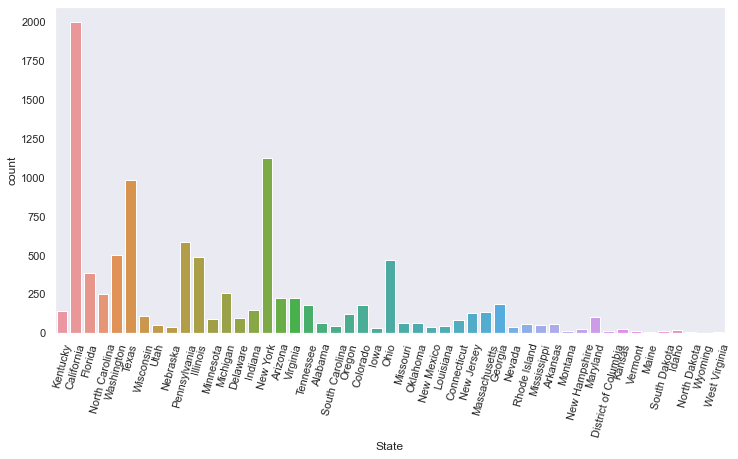

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x='State', data=Superstore)
plt.xticks(rotation=(75))
plt.show()

##### The plot above indicates that people who are located at Carlifornia, Texas, New York, Nebraska, Pennysylvania, Illonois, Ohio purchases more of the Company's product.... The Company should tr to get their branches close to those states, so it can ease the stress of the customers, and that will definitely increase sales....
